In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

#실수 설정 옵션 (소수 둘째 짜리까지)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
np.random.seed(42)

# 데이터셋
- 날짜 api 추가
- 평균기온 merge
- train x,y, test x,y 셋 분리 

In [3]:
df_modu = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')
df_trafic = pd.read_excel('./모두컴퍼니_기술과제/2020교통량통합.xlsx')
df_weather = pd.read_csv('./모두컴퍼니_기술과제/서울시_기상데이터.csv',encoding = 'cp949')
df_weatherapi = pd.read_csv('weather_day.csv', encoding ='cp949')

In [4]:
df_modu

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


### 날씨 데이터 merge

In [5]:
df_weatherapi

,Unnamed: 0,3시간 적설량,가조시간,일강수량,일시,일적설량,지면온도,지점,평균10cm 지중온도,평균20cm 지중온도,평균5cm 지중온도,평균기온,평균상대습도,평균풍속
0,0,0.000,9.600,0.100,2020-01-01,0.000,-0.900,108,0.500,1.900,-0.400,-2.200,2,0.600
1,1,NaN,9.600,NaN,2020-01-02,NaN,0.100,108,0.700,1.700,0.000,1.000,1212,1.200
2,2,NaN,9.700,NaN,2020-01-03,NaN,-0.400,108,1.000,1.800,0.300,-0.100,1430,1.700
3,3,NaN,9.700,NaN,2020-01-04,NaN,0.000,108,1.100,1.900,0.400,1.200,1457,1.900
4,4,NaN,9.700,NaN,2020-01-05,NaN,-0.500,108,1.000,1.800,0.200,1.300,1518,1.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,NaN,9.600,0.000,2020-12-27,NaN,1.400,108,0.200,0.700,0.700,5.800,1457,1.800
362,362,NaN,9.600,1.300,2020-12-28,NaN,2.700,108,1.600,1.400,2.600,6.700,1618,1.400
363,363,NaN,9.600,0.200,2020-12-29,NaN,-0.100,108,1.600,2.000,2.100,0.100,2040,2.900
364,364,NaN,9.600,NaN,2020-12-30,NaN,-4.400,108,0.500,1.300,0.600,-10.900,1525,4.100


In [6]:
df_weatherapi.drop(['Unnamed: 0','3시간 적설량','가조시간','일강수량','일적설량',
                   '지면온도','지점','평균10cm 지중온도','평균20cm 지중온도',
                   '평균5cm 지중온도','평균상대습도','평균풍속'], axis = 1, inplace = True)

In [7]:
df_weatherapi

,일시,평균기온
0,2020-01-01,-2.200
1,2020-01-02,1.000
2,2020-01-03,-0.100
3,2020-01-04,1.200
4,2020-01-05,1.300
...,...,...
361,2020-12-27,5.800
362,2020-12-28,6.700
363,2020-12-29,0.100
364,2020-12-30,-10.900


In [8]:
df_weatherapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      366 non-null    object 
 1   평균기온    366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
#이름 재배치
name = ['DATE', 'TEMP']
df_weatherapi =df_weatherapi.rename(columns = dict(zip(df_weatherapi.columns, name)))


In [10]:
# #merge
# df_modu = pd.merge(df_modu,df_weatherapi, how='outer',on='DATE')

In [11]:
df_modu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


## 미세먼지 피쳐

In [12]:
df_dust = pd.read_csv('일별평균대기오염도_2020.csv', encoding = 'cp949') 

df_dust

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.700,0.003,30.000,22.000
1,20200101,강동구,0.036,0.005,0.500,0.003,35.000,27.000
2,20200101,강북구,0.045,0.004,0.600,0.003,40.000,26.000
3,20200101,강서구,0.040,0.004,0.600,0.005,38.000,22.000
4,20200101,공항대로,0.041,0.003,0.600,0.005,41.000,23.000
...,...,...,...,...,...,...,...,...
18169,20201231,청계천로,0.021,0.019,0.500,0.003,25.000,15.000
18170,20201231,한강대로,0.026,0.017,0.500,0.003,30.000,10.000
18171,20201231,행주,0.013,0.026,0.600,0.003,24.000,10.000
18172,20201231,홍릉로,0.027,0.014,0.500,0.004,5.000,3.000


In [13]:
df_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18174 entries, 0 to 18173
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18174 non-null  int64  
 1   측정소명          18174 non-null  object 
 2   이산화질소농도(ppm)  17786 non-null  float64
 3   오존농도(ppm)     17799 non-null  float64
 4   이산화탄소농도(ppm)  17789 non-null  float64
 5   아황산가스(ppm)    17797 non-null  float64
 6   미세먼지(㎍/㎥)     17548 non-null  float64
 7   초미세먼지(㎍/㎥)    17541 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [14]:
df_dust=df_dust[['측정일시','초미세먼지(㎍/㎥)']]

#문자형 변환
df_dust['측정일시']=df_dust['측정일시'].astype('str')

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18174 entries, 0 to 18173
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   측정일시        18174 non-null  object 
 1   초미세먼지(㎍/㎥)  17541 non-null  float64
dtypes: float64(1), object(1)
memory usage: 284.1+ KB


In [16]:
df_dust['측정일시'] = pd.to_datetime(df_dust['측정일시'])

df_dust['측정일시']=df_dust['측정일시'].astype('str')

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#이름 재배치
name = ['DATE', 'DUST']
df_dust =df_dust.rename(columns = dict(zip(df_dust.columns, name)))

In [18]:
#미세먼지 평균
df_dust2=df_dust.groupby(['DATE']).mean()

df_modu = pd.merge(df_modu,df_dust2, how='outer',on='DATE')

In [19]:
df_modu[df_modu['DUST'].isnull()]

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,DUST
93395,4375,2014-01-31,AA,182335,A,2020-02-22,1,SC,NaN
93396,9794,2014-05-17,BB,220655,A,2020-02-22,1,JRR,NaN
93397,15610,2014-09-12,BB,173209,A,2020-02-22,1,J,NaN
93398,19806,2014-09-28,BB,220721,A,2020-02-22,1,BF,NaN
93399,28641,2014-11-05,AA,183301,A,2020-02-22,1,J,NaN
...,...,...,...,...,...,...,...,...,...
96618,1504810,2020-02-23,BB,203771,D,2020-02-23,1,J,NaN
96619,1504870,2020-02-23,BB,109839,A,2020-02-23,1,GN,NaN
96620,1504875,2020-02-23,BB,2334,B,2020-02-23,1,MP,NaN
96621,1504889,2020-02-23,BB,1900,B,2020-02-23,1,GN,NaN


- 왠지 모르겠지만 2월22, 23 값이 존재하지 않는다 
- 보간해주자

<AxesSubplot:>

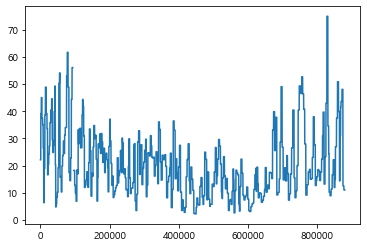

In [20]:
df_modu.DUST.plot()

### 데이터 보간

In [21]:
df_modu['DUST'].fillna(method = 'pad', inplace = True)


df_modu.info()

#csv 보관
df_modu.to_csv('moducom+dust.csv', index = False, encoding = 'cp949')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879271 entries, 0 to 879270
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     879271 non-null  int64  
 1   JOIN_DATE   879271 non-null  object 
 2   D_TYPE      879271 non-null  object 
 3   STORE_ID    879271 non-null  int64  
 4   GOODS_TYPE  879271 non-null  object 
 5   DATE        879271 non-null  object 
 6   COUNT       879271 non-null  int64  
 7   AD1         879271 non-null  object 
 8   DUST        879271 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 67.1+ MB


### test, train 셋 분리

In [22]:
df_modu_train = df_modu.loc[df_modu['DATE'].between('2020-01-01', '2020-09-30')]
df_modu_test = df_modu.loc[df_modu['DATE'].between('2020-10-01', '2020-12-31')]

In [23]:
df_modu_test

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,DUST
623579,15521,2014-09-12,AA,182320,A,2020-10-01,1,JRR,10.522
623580,17651,2014-09-19,BB,82434,D,2020-10-01,1,J,10.522
623581,26388,2014-10-25,BB,182320,A,2020-10-01,1,JRR,10.522
623582,81772,2015-05-02,BB,204438,A,2020-10-01,1,DJ,10.522
623583,92258,2015-05-24,AA,220745,A,2020-10-01,1,SD,10.522
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,11.080
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,11.080
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,11.080
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,11.080


In [24]:
#train, test, x,y 분리

train_x =df_modu_train.drop('COUNT',axis=1)
train_y = df_modu_train[['COUNT']]

test_x = df_modu_test.drop('COUNT',axis=1)
test_y = df_modu_test[['COUNT']]

In [25]:
train_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'], axis = 1, inplace = True)

test_x.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE'], axis = 1, inplace = True)

In [26]:
test_y

,COUNT
623579,1
623580,1
623581,1
623582,1
623583,1
...,...
879266,1
879267,1
879268,1
879269,1


### 범주형자료 인코딩 (레이블 인코딩)
- 해강님 감사합니다

In [27]:
# 앞에 범주형 레이블인코딩
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train_x['D_TYPE'] = le.fit_transform(train_x['D_TYPE'])
train_x['GOODS_TYPE'] = le.fit_transform(train_x['GOODS_TYPE'])
train_x['AD1'] = le.fit_transform(train_x['AD1'])

test_x['D_TYPE'] = le.fit_transform(test_x['D_TYPE'])
test_x['GOODS_TYPE'] = le.fit_transform(test_x['GOODS_TYPE'])
test_x['AD1'] = le.fit_transform(test_x['AD1'])

print(train_x['D_TYPE'].unique())
print(train_x['GOODS_TYPE'].unique())
print(train_x['AD1'].unique())

print(test_x['D_TYPE'].unique())

[0 1 2]
[0 2 1 3]
[37 46 60 49 48 74 35 75 40 28  3 20  0 13 50 17 73 61 29 41 21 57 27 39
 34 59 44 52 42 47 30 33 36 11 63  6  4 26 43 12 53 31 45 18 32 25 71 19
  2 15 38 66  1 22 70  5 77 24 54  7 76 58 55 23 65  8 72  9 67 14 64 62
 56 10 16 68 69 51]
[0 1 2]


## Random Forest Estimator 선언, 학습, 예측

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(train_x, train_y)
predicted = RF.predict(test_x)

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [29]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# kfold = KFold(n_splits=6, shuffle = True, random_state=0)
# scores = cross_val_score(RF, train_x, train_y, cv = kfold)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(test_y, predicted))
print(mean_squared_error(test_y, predicted))

0.05778392970705883
0.4030643731486087


## light gbm

In [31]:
!pip install lightgbm

In [32]:
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

- lightgbm 데이터셋 변환

In [33]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [34]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [35]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 623579, number of used features: 4
[LightGBM] [Info] Start training from score 1.027009
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.419048
[200]	valid_0's l2: 0.403424
[300]	valid_0's l2: 0.39902
[400]	valid_0's l2: 0.398594
Early stopping, best iteration is:
[375]	valid_0's l2: 0.398225


In [36]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [37]:
print('mse :' ,mean_squared_error(test_y, predict_test))
print('mae :', mean_absolute_error(test_y,predict_test))

mse : 0.39822482099841733
mae : 0.052344827825995296


In [38]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [39]:
final_result.columns = ['label','predict']

In [40]:
final_result

,label,predict
0,1,1.015
1,1,1.033
2,1,1.014
3,1,1.012
4,1,1.020
...,...,...
255687,1,1.012
255688,1,1.007
255689,1,1.013
255690,1,1.011


- 미세먼지
    - Randomforest
    mse : 0.4030643731486087
    mae : 0.05778392970705883  
    - lgbm
    mse : 0.39822482099841733
    mae : 0.052344827825995296
- 미세먼지+avg_temp
    - Randomforest
    mse : 0.41162349342383364
    mae : 0.05719640934471645
    - lgbm
    mse : 0.41057590695854373
    mae : 0.05121249950455151
    <br>
    <br>
    
  ###  GOODS_TYPE 추론
  - 요일 별 EDA 진행 결과 대부분 피쳐들은 일요일과 다른요일에 COUNT 차이가 존재
  - GOODS_TYPE만 주중과 주말의 차이가 존재
  - 특히 A,C 그리고 B,D가 나뉘어 주말 기준으로 주중과 차이 존재
  - 주차 어플에서 주중 주말 차이가 나는 건 평일권(주간,야간), 주말권(주간,야간)이지 않을까 생각